## Lession 3 Notebook - March 06, 2024
### Cosmological Distances

Remember that in flat $\Lambda$CDM the comoving distance is given by $d(z)=\int_0^z\frac{c}{H(z')}dz'$. 

The angular diameter distance is $d_A(z)=d(z)/(1+z)$

The luminosity distance is $d_L(z) = (1+z)^2 d_A(z) = (1+z)d(z)$

In [1]:
import sys

In [2]:
sys.path.append('../')          

#needed for importing modules which are not in the same directory as the file, 
#nor installed with pip

In [3]:
from pyACC.cosmology import cosmology

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def H(z, Om_m, H0):
    return H0*np.sqrt(Om_m*(1+z)**3+(1-Om_m))

In [6]:
z=np.linspace(0,5, 500)

In [7]:
args={"Om_m":0.31,
"H0":67.5}

In [8]:
## construct a CosmologicalDistances class instance
cosmo_dist=cosmology.CosmologicalDistances(H, H0=args['H0'], Om_m=args['Om_m'])

In [9]:
d=cosmo_dist.comoving_distance(z, step=0.01)
d_A = cosmo_dist.angular_diameter_distance(z, step=0.01)
d_L = cosmo_dist.luminosity_distance(z, step=0.01)

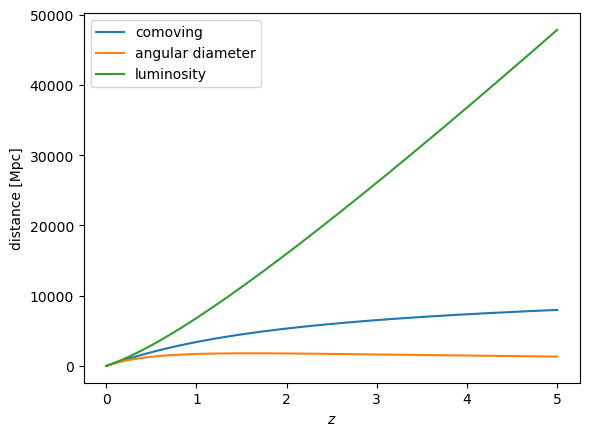

In [10]:
plt.plot(z,d, label='comoving')
plt.plot(z,d_A, label='angular diameter')
plt.plot(z, d_L, label='luminosity')
plt.xlabel('$z$')
plt.ylabel('distance [Mpc]')
plt.legend()